In [74]:
# Import necessary dependencies
import pygmt
import geopandas as gpd
import xarray as xr

In [75]:
# Mars Topography (MOLA) from the European Space Agency
# !wget https://github.com/andrebelem/PlanetaryMaps/raw/v1.0/mola32.nc

In [76]:
# Load the global MOLA NetCDF file
dset_mars = xr.open_dataset("/Users/sisipalao/Documents/mola32.nc")
print(dset_mars)  # This will show all variables, dimensions, and attributes

<xarray.Dataset> Size: 133MB
Dimensions:    (latitude: 5760, longitude: 11520)
Coordinates:
  * latitude   (latitude) float32 23kB 89.98 89.95 89.92 ... -89.95 -89.98
  * longitude  (longitude) float32 46kB 0.01562 0.04688 0.07812 ... 360.0 360.0
Data variables:
    alt        (latitude, longitude) int16 133MB ...
Attributes:
    title:    MOLA Topography - 32 pixels/degree
    history:  Built from original MOLA file megt90n000fb.img


In [77]:
# Filter for Planum Boreum region (lat ≥ 80°N)
planum_boreum = dset_mars.where(dset_mars.latitude >= 80, drop=True)

## Remark------------------------------------------------------------------------
- To crop the area of interest (AOI), we use `.sel` function

- For example, 

```python
dset_aoi = dset_mars.sel(latitude=slice(25, 13), longitude=slice(210, 240)).alt.astype('float')

fig = pygmt.Figure()
fig.grdimage(grid=dset_aoi, projection='M12', frame='a', cmap='geo')
fig.colorbar(frame='a2500', 'x+lElevation (m)', 'y')
fig.show


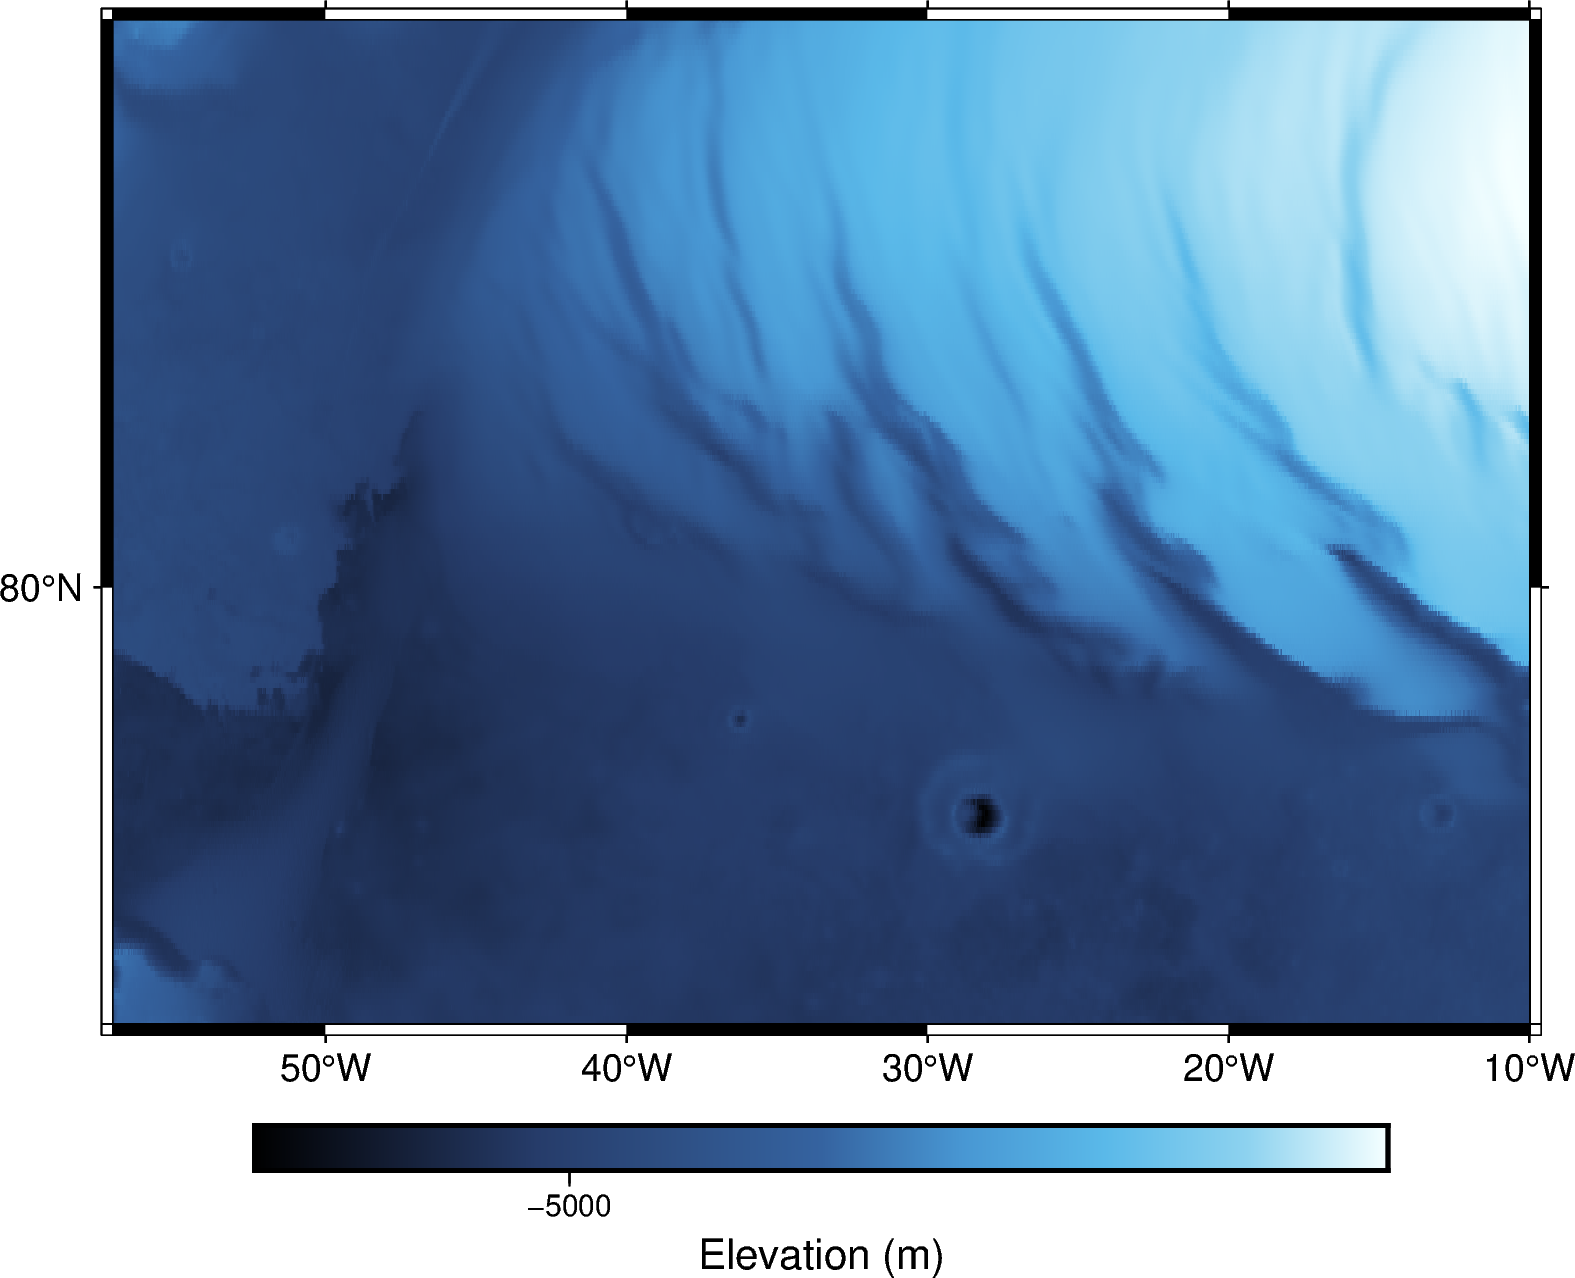

In [78]:
dset_aoi = dset_mars.sel(latitude=slice(82.8, 77.12), longitude=slice(302.92, 350.02)).alt.astype('float')

fig = pygmt.Figure()
fig.grdimage(grid=dset_aoi, projection='M12', frame='a', cmap='geo')
fig.colorbar(frame=['a2500', 'x+lElevation (m)', 'y'])
fig.show()

In [79]:
# Optional: show basic info
print(planum_boreum)

<xarray.Dataset> Size: 15MB
Dimensions:    (latitude: 320, longitude: 11520)
Coordinates:
  * latitude   (latitude) float32 1kB 89.98 89.95 89.92 ... 80.08 80.05 80.02
  * longitude  (longitude) float32 46kB 0.01562 0.04688 0.07812 ... 360.0 360.0
Data variables:
    alt        (latitude, longitude) float32 15MB -1.977e+03 ... -3.677e+03
Attributes:
    title:    MOLA Topography - 32 pixels/degree
    history:  Built from original MOLA file megt90n000fb.img


In [80]:
# Save the cropped data to a new NetCDF file
planum_boreum.to_netcdf("planum_boreum_mola.nc")
print("Saved cropped region to planum_boreum_mola.nc") 

Saved cropped region to planum_boreum_mola.nc


In [81]:
# Convert the cropped Planum Boreum elevation data
planum_boreum_float = planum_boreum.alt.astype(float)

planum_boreum_sampled = pygmt.grdsample(grid=planum_boreum_float, translate=True, spacing=[1, 1])

grdsample [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdsample [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdsample (gmtapi_init_grdheader): Please select compatible -R and -I values
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [82]:
# fig = pygmt.Figure()

# fig.grdimage(
    # grid=planum_boreum_sampled,
    # region='0/360/80/90',  # Mars longitude 0-360°, latitude 80°N to 90°N
    # projection='Cyl_stere/0/90/10c',  # Cylindrical stereographic projection centered on North Pole
    # cmap="copper",
    # frame=True) 

# fig.colorbar(frame=["+lElevation (m)"])
# fig.show()

In [83]:
# fig.savefig("Planum_Boreum.png")

In [84]:
dset_mars_topo_ = dset_mars.alt.astype(float)

dset_mars_topo = pygmt.grdsample(grid=dset_mars_topo_, translate=True, spacing=[1,1])

grdsample [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdsample [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdsample (gmtapi_init_grdheader): Please select compatible -R and -I values
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


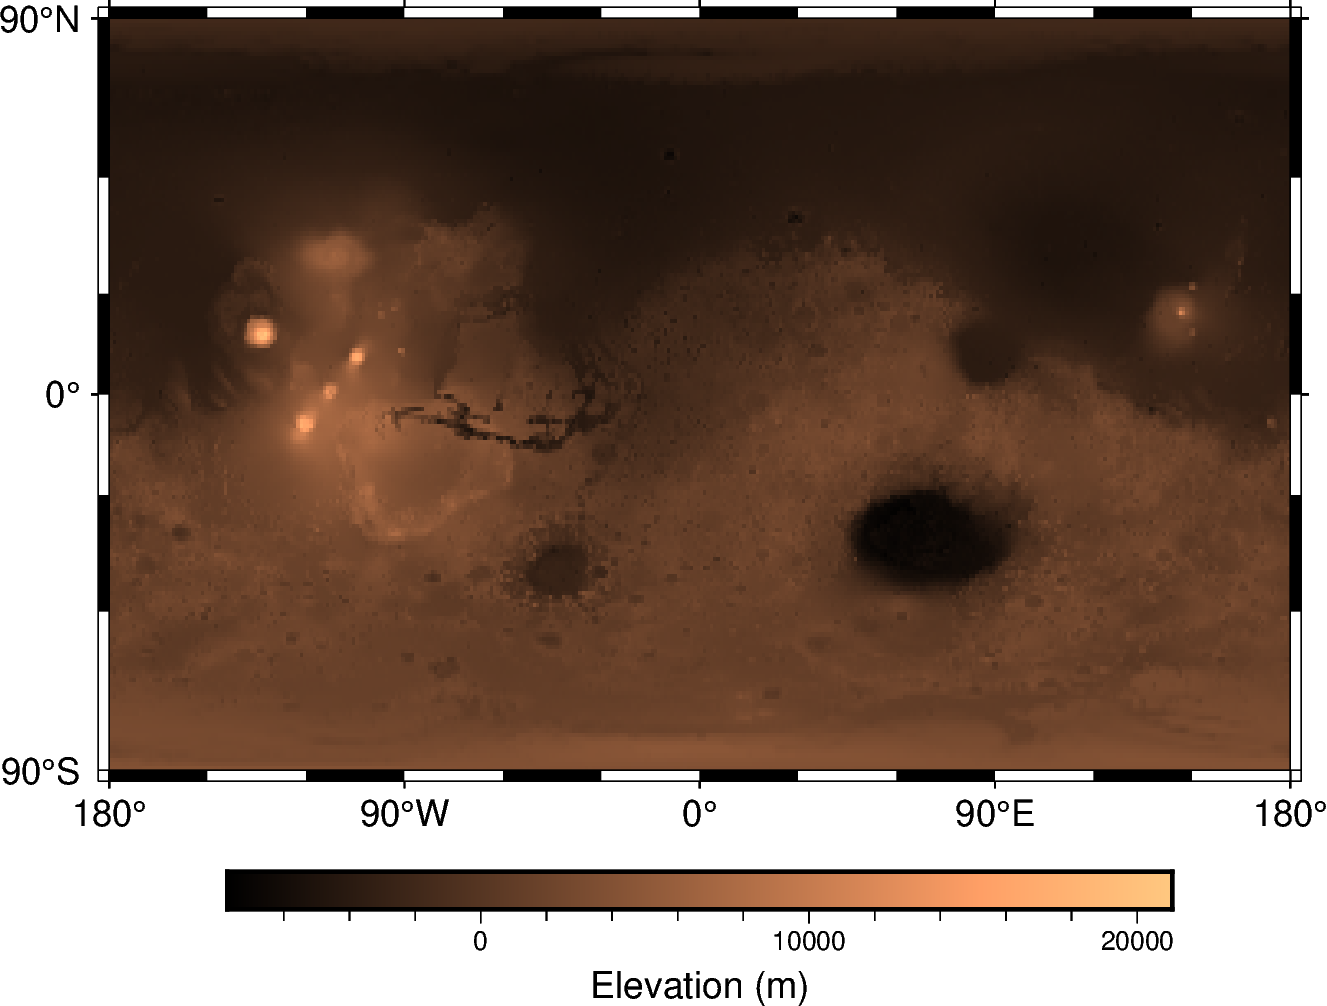

In [85]:
fig = pygmt.Figure()

fig.grdimage(
    grid=dset_mars_topo,
    region='g',  
    projection='Cyl_stere/0/0/10c',  # Cylindrical stereographic projection centered on North Pole
    cmap="copper",
    frame=True
)

fig.colorbar(frame=["+lElevation (m)"])
fig.show()